<h2>DataSet: <a href="https://data.wprdc.org/dataset/arrest-data">Pittsburgh Police Arrest Data</a></h2>

This notebook focuses on the areas where people have been taken into custody. One submetric of being the best neighborhood in Pittsburgh would be safety. This notebook would evaluate the safety of certain neighborhoods in Pittsburgh to a particular degree.

These are the necessary libraries for this notebook:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import seaborn as sb

In [2]:
# load csv file with index column as a date
data = pd.read_csv("arrests.csv",
                           index_col="ARRESTTIME", 
                           parse_dates=True)

Lets take a look at the information contained in this data

In [3]:
data.head(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
ARRESTTIME,,,,,,,,,,,,,,,,
2016-08-24 12:20:00,1,1975272,16158872,42.0,F,B,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
2016-08-03 14:55:00,2,1974456,16144120,31.0,M,W,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2016-08-03 16:45:00,3,1974466,16144165,63.0,F,B,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
2016-08-05 02:36:00,4,1974550,16145257,25.0,F,W,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
2016-08-06 02:00:00,5,1974596,16145962,25.0,M,B,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


Lets take a look at the arrest made each year

In [4]:
data.resample("Y").size()

ARRESTTIME
2015-12-31       17
2016-12-31     4146
2017-12-31    12179
2018-12-31    10899
2019-12-31    10731
2020-12-31     7938
2021-12-31     7430
2022-12-31     6729
2023-12-31     6371
Freq: A-DEC, dtype: int64

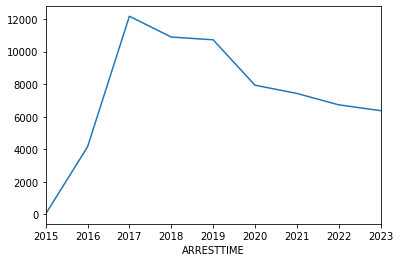

In [5]:
data['_id'].resample("Y").count().plot()

Hmm looks like 2015's arrest data may be incomplete. Overall, there seems to be a general decline of arrests according to the data set.